# Chapter 06 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: College admissions data

 Load and preprocess the data

In [3]:
df = pd.read_csv("berkeley.csv")
df = df[df["Major"] != "Other"]

 Create a 2 x 2 table

In [4]:
pd.crosstab(df["Admission"], df["Gender"], margins=True)

Gender,F,M,All
Admission,,,
Accepted,557,1511,2068
Rejected,1278,1493,2771
All,1835,3004,4839


 Percent by column

In [5]:
(pd.crosstab(df["Admission"], df["Gender"], margins=True, normalize="columns") * 100).round(2)

Gender,F,M,All
Admission,,,
Accepted,30.35,50.3,42.74
Rejected,69.65,49.7,57.26


# Example: College admissions data (continued)

 Load, process the data, and create a 2x2 table

In [6]:
df = pd.read_csv("berkeley.csv")
df = df[df["Major"] != "Other"]
admission_gender = pd.crosstab(df["Gender"], df["Major"], margins=True)
admission_gender

Major,A,B,C,D,E,F,All
Gender,,,,,,,
F,108,25,593,375,393,341,1835
M,1138,560,325,417,191,373,3004
All,1246,585,918,792,584,714,4839


 Percentage of department applications by gender

In [7]:
100 * pd.crosstab(df["Gender"], df["Major"], margins=True, normalize="columns").round(4)

Major,A,B,C,D,E,F,All
Gender,,,,,,,
F,8.67,4.27,64.6,47.35,67.29,47.76,37.92
M,91.33,95.73,35.4,52.65,32.71,52.24,62.08


 Male/female applications by department

In [8]:
100 * pd.crosstab(df["Gender"], df["Major"], margins=True, normalize="index").round(4)

Major,A,B,C,D,E,F
Gender,,,,,,
F,5.89,1.36,32.32,20.44,21.42,18.58
M,37.88,18.64,10.82,13.88,6.36,12.42
All,25.75,12.09,18.97,16.37,12.07,14.76


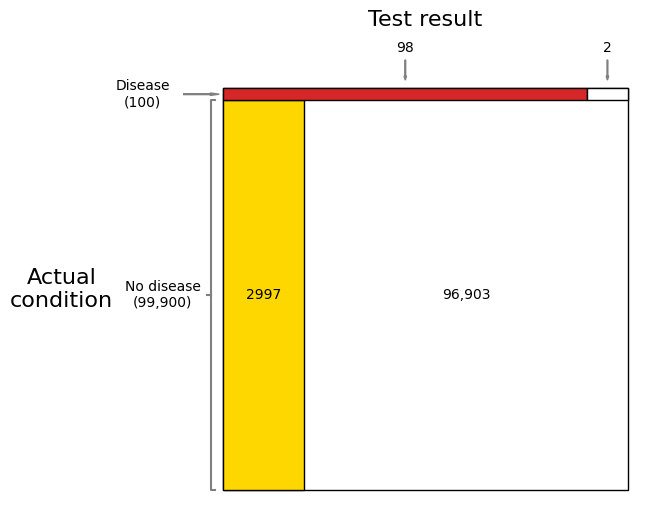

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow

x1 = 20
x2 = 90
y = 97
fig, ax = plt.subplots(figsize=(6, 6))
ax.add_patch(Rectangle((0, 0), 100, 100, ec="black", color="white"))
ax.add_patch(Rectangle((0, 0), x1, y, ec="black", color="gold"))
ax.add_patch(Rectangle((0, y), x2, 100-y, ec="black", color="C3"))
ax.add_patch(Rectangle((x2, y), 100-x2, 100-y, ec="black", color="white"))

ax.text(0.5*(100+x1), 0.5*y, "96,903", ha="center", va="center")
ax.text(0.5*(x1), 0.5*y, "2997", ha="center", va="center")

ax.text(0.5*(x2), 110, "98", ha="center", va="center")
ax.text(0.5*(100+x2), 110, "2", ha="center", va="center")
ax.add_patch(Arrow(0.5*(x2), 107, 0, -5, color="grey"))
ax.add_patch(Arrow(0.5*(100+x2), 107, 0, -5, color="grey"))

ax.text(-20, 0.5*(100+y), "Disease\n(100)", ha="center", va="center")
ax.add_patch(Arrow(-12, 0.5*(100+y), 11, 0, color="grey"))
ax.text(-15, 0.5*(y), "No disease\n(99,900)", ha="center", va="center")
ax.plot([-2, -3, -3, -2], [0, 0, y, y], color='grey')
ax.plot([-4, -3], [y/2, y/2], color='grey')

ax.text(50, 117, "Test result", ha="center", va="center", fontsize=16)
ax.text(-40, 50, "Actual\ncondition", ha="center", va="center", fontsize=16)

ax.set_xlim(-10, 105)
ax.set_ylim(-5, 110)
ax.set_axis_off()
plt.show()

# Independence

 Admission rates by department

In [10]:
100 * pd.crosstab(df["Admission"], df["Major"], margins=True, normalize="columns").round(4)

Major,A,B,C,D,E,F,All
Admission,,,,,,,
Accepted,73.35,63.25,34.97,33.96,25.17,6.58,42.74
Rejected,26.65,36.75,65.03,66.04,74.83,93.42,57.26


## The chi-square distribution

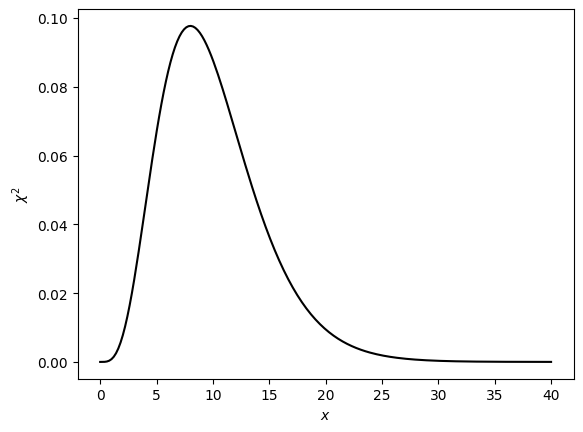

In [11]:
import numpy as np
from scipy import stats
x = np.linspace(0, 40, 200)
distribution = pd.DataFrame({
    'x': x,
    'chi_2': stats.chi2(df=10).pdf(x),
})
ax = distribution.plot(x='x', y='chi_2', legend=False, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$\chi^2$')
plt.show()

# Simpson's Paradox

 Berkeley admission rates

In [12]:
100 * pd.crosstab(df["Admission"], df["Gender"], margins=True, normalize="columns").round(4)

Gender,F,M,All
Admission,,,
Accepted,30.35,50.3,42.74
Rejected,69.65,49.7,57.26


 Berkeley admission rates by department

In [13]:
admitted = df[df["Admission"] == "Accepted"]
(pd.crosstab(admitted["Gender"], admitted["Major"]) /
pd.crosstab(df["Gender"], df["Major"]))

Major,A,B,C,D,E,F
Gender,,,,,,
F,0.824074,0.680000,0.338954,0.349333,0.239186,0.073314
M,0.724956,0.630357,0.369231,0.330935,0.277487,0.058981
